<a href="https://colab.research.google.com/github/ApostolisMoschopoulos/Hepatitis-A-Model-Predictions/blob/main/hepatitisModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Στόχος της παρούσας εργασίας είναι η επιτυχής πρόβλεψη εαν ένα άτομο πάσχει με ηπατίτιδα. Να σημειωθεί ότι στη παρούσα εργασία με την χρήση του όρου "Ηπατίτιδα" θα εννοείται η Ηπατίτιδα Α. Το data set που χρησιμοποιήθηκε για την εκπόνηση της παρούσας εργασίας μπορεί να διατεθεί στο: https://datahub.io/machine-learning/hepatitis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
import os
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt



print("Using TensorFlow version %s" % tf.__version__)


Using TensorFlow version 2.4.1


# Importing data set

  Εισάγουμε το data set με βάση το οποίο θα εκπαιδεύσουμε το μοντέλο μας.

In [ ]:
from scipy import stats

import seaborn as sns; sns.set()
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Νευρωνικά δίκτυα εργασία 2/hepatitis.data")

In [ ]:
print(df.shape)
df.head(4)

(154, 20)


,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


Βάζουμε σαν στήλες τα χαρακτηριστικά (attributes) του συνόλου δεδομένων μας. Σημείωση: σαν SGOT εννοείται ο όρος Serum glutamic oxaloacetic transaminase (ένζυμο που εκκρίνεται στο αίμα όταν υπάρχει ζημιά στην καρδιά ή στο Ήπαρ).

In [ ]:
colNames = ['Class','Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 
               'Anorexia', 'Liver big', 'Liver firm', 'Spleen palpable', 'Spiders',
               'Ascites', 'Varices', 'Bilirubin', 'Alkaline Phosphatase(ALP)',
               'SGOT', 'Albumin', 'Prothrombin time', 'Histology' ]
        
df = pd.read_csv("/content/drive/MyDrive/Νευρωνικά δίκτυα εργασία 2/hepatitis.data",names=colNames)
df.head(5)

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver big,Liver firm,Spleen palpable,Spiders,Ascites,Varices,Bilirubin,Alkaline Phosphatase(ALP),SGOT,Albumin,Prothrombin time,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


Έχουμε φτιάξει τον πίνακα 

In [ ]:
print(df['Age'].values)
for colName in df.columns:
  print(colName)

[30 50 78 31 34 34 51 23 39 30 39 32 41 30 47 38 66 40 38 38 22 27 31 42
 25 27 49 58 61 51 39 62 41 26 35 37 23 20 42 65 52 23 33 56 34 28 37 28
 36 38 39 39 44 40 30 37 34 30 64 45 37 32 32 36 49 27 56 57 39 44 24 34
 51 36 50 32 58 34 34 28 23 36 30 67 62 28 44 30 38 38 50 42 33 52 59 40
 30 44 47 60 48 22 27 51 47 25 35 45 54 33  7 42 52 45 36 69 24 50 61 54
 56 20 42 37 50 34 28 50 54 57 54 31 48 72 38 25 51 38 47 45 36 54 51 49
 45 31 41 70 20 36 46 44 61 53 43]
Class
Age
Sex
Steroid
Antivirals
Fatigue
Malaise
Anorexia
Liver big
Liver firm
Spleen palpable
Spiders
Ascites
Varices
Bilirubin
Alkaline Phosphatase(ALP)
SGOT
Albumin
Prothrombin time
Histology


Επίσης για να έχω καλύτερο έλεγχο των δεδομένων μου θέλω να γνωρίζω τις κατηγορικές και τις αριθμητικές τιμές μου

In [ ]:
numericals = ['Age', 'Bilirubin', 'Prothrombin time', 'Albumin', 'Alkaline Phosphatase(ALP)', 'SGOT']
categoricals = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver big', 
                'Liver firm', 'Spleen palpable', 'Spiders', 'Ascites', 'Varices', 'Histology']


# Data Cleansing

Τώρα θα συνεχίσουμε σε καθαρισμό των δεδομένων μας. Πιο συγκεκριμένα:

*   Θα μετατρέψουμε όλα τα ερωτηματικά σε NaN (not a number)
*   Για κάθε numerical attribute θα μετρήσουμε σε πόσα παραδείγματα λείπει. Έαν λείπει σχετικά μεγάλος αριθμός (35%<) τότε θα απορρίψουμε τελείως το χαρακτηριστικό αλλιώς θα βάλουμε σαν μεταβλητή τη **μέση τιμή** των υπολοίπων παραδειγμάτων για το συγκεκριμένο χαρακτηριστικό.
*   Για κάθε categorical atrribute, θα αντικαταστήσουμε τις κενές τιμές με την **επικρατέστερη τιμή** των υπολοίπων παραδειγμάτων για το συγκεκριμένο χαρακτηριστικό.








# Μετατροπή σε NaN

In [ ]:
df.replace('?', np.NaN, inplace = True)

print(df.head(3))

   Class  Age  Sex Steroid  ...  SGOT Albumin Prothrombin time Histology
0      2   30    2       1  ...    18     4.0              NaN         1
1      2   50    1       1  ...    42     3.5              NaN         1
2      2   78    1       2  ...    32     4.0              NaN         1

[3 rows x 20 columns]


In [ ]:
print(df.count())
88/155

Class                        155
Age                          155
Sex                          155
Steroid                      154
Antivirals                   155
Fatigue                      154
Malaise                      154
Anorexia                     154
Liver big                    145
Liver firm                   144
Spleen palpable              150
Spiders                      150
Ascites                      150
Varices                      150
Bilirubin                    149
Alkaline Phosphatase(ALP)    126
SGOT                         151
Albumin                      139
Prothrombin time              88
Histology                    155
dtype: int64


0.567741935483871

Θα μετατρέψω τις numerical μεταβλητές σε float

In [ ]:
df['Bilirubin'] = df.Bilirubin.astype(float)
df['Prothombin time'] = df['Prothrombin time'].astype(float)
df["Alkaline Phosphatase(ALP)"] = df["Alkaline Phosphatase(ALP)"].astype(float)
df["SGOT"] = df.SGOT.astype(float)
df["Albumin"] = df.Albumin.astype(float)

# Διαγραφή Χαρακτηριστικών

Όπως καθαρά φαίνεται, για το χαρακτηριστικό Prothrombin time, έχουμε πληροφορίες μόνο στο 56% των instances, επομένως αυτό το χαρακτηριστικό θα το διώξουμε από το data set.

In [ ]:
del df['Prothrombin time']
numericals = ['Age', 'Bilirubin', 'Albumin', 'Alkaline Phosphatase(ALP)', 'SGOT']
print(df.count())

Class                        155
Age                          155
Sex                          155
Steroid                      154
Antivirals                   155
Fatigue                      154
Malaise                      154
Anorexia                     154
Liver big                    145
Liver firm                   144
Spleen palpable              150
Spiders                      150
Ascites                      150
Varices                      150
Bilirubin                    149
Alkaline Phosphatase(ALP)    126
SGOT                         151
Albumin                      139
Histology                    155
Prothombin time               88
dtype: int64


In [ ]:
print(126/155)

0.8129032258064516


Την ίδια διαδικασία θα ακολουθήσουμε και για το χαρακτηριστικό Alkaline Phosphotase(ALP) το οποίο περιέχεται στο 81% των παραδειγμάτων.

In [ ]:
del df['Alkaline Phosphatase(ALP)']
numericals = ['Age', 'Bilirubin', 'Albumin', 'SGOT']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          154 non-null    object 
 4   Antivirals       155 non-null    int64  
 5   Fatigue          154 non-null    object 
 6   Malaise          154 non-null    object 
 7   Anorexia         154 non-null    object 
 8   Liver big        145 non-null    object 
 9   Liver firm       144 non-null    object 
 10  Spleen palpable  150 non-null    object 
 11  Spiders          150 non-null    object 
 12  Ascites          150 non-null    object 
 13  Varices          150 non-null    object 
 14  Bilirubin        149 non-null    float64
 15  SGOT             151 non-null    float64
 16  Albumin          139 non-null    float64
 17  Histology       

Πλέον έχοντας αφαιρέσει τα attirubtes που μπορούν να προκαλέσουν πρόβλημα, μπορώ να συνεχίσω.

Θα γεμίσω για τις υπόλειπες numerical μεταβλητες με τους μεσους όρους τους

In [ ]:
numericals = ['Age', 'Bilirubin', 'Albumin', 'SGOT']
df[numericals].fillna(df[numericals].mean()).head(6)

,Age,Bilirubin,Albumin,SGOT
0,30,1.0,4.0,18.0
1,50,0.9,3.5,42.0
2,78,0.7,4.0,32.0
3,31,0.7,4.0,52.0
4,34,1.0,4.0,200.0
5,34,0.9,4.0,28.0


Όσον αφορά τις κατηγορικές μεταβλτηές, θα συμπληρώσουμε τα κενά με την επικρατέστερη τιμή (αυτή που εμφανίζεται πιο συχνά)

In [ ]:
categoricals = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
              'Liver big', 'Liver firm', 'Spleen palpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
colNames = ['Class','Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 
               'Anorexia', 'Liver big', 'Liver firm', 'Spleen palpable', 'Spiders',
               'Ascites', 'Varices', 'Bilirubin', 'SGOT', 'Albumin', 'Histology' ]
df[categoricals].apply(pd.Series.value_counts)

,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver big,Liver firm,Spleen palpable,Spiders,Ascites,Varices,Histology
1,139.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0
2,16.0,NaN,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0
1,NaN,76.0,NaN,100.0,61.0,32.0,25.0,60.0,30.0,51.0,20.0,18.0,NaN
2,NaN,78.0,NaN,54.0,93.0,122.0,120.0,84.0,120.0,99.0,130.0,132.0,NaN


In [ ]:
result = df.fillna(df.mode().iloc[0])
imputedDF = result
print(imputedDF)

     Class  Age  Sex Steroid  ...   SGOT Albumin Histology Prothombin time
0        2   30    2       1  ...   18.0     4.0         1           100.0
1        2   50    1       1  ...   42.0     3.5         1           100.0
2        2   78    1       2  ...   32.0     4.0         1           100.0
3        2   31    1       2  ...   52.0     4.0         1            80.0
4        2   34    1       2  ...  200.0     4.0         1           100.0
..     ...  ...  ...     ...  ...    ...     ...       ...             ...
150      1   46    1       2  ...  242.0     3.3         2            50.0
151      2   44    1       2  ...  142.0     4.3         2           100.0
152      2   61    1       1  ...   20.0     4.1         2           100.0
153      2   53    2       1  ...   19.0     4.1         2            48.0
154      1   43    1       2  ...   19.0     3.1         2            42.0

[155 rows x 19 columns]


In [ ]:
imputedDF["Class"] = imputedDF["Class"].astype(int)

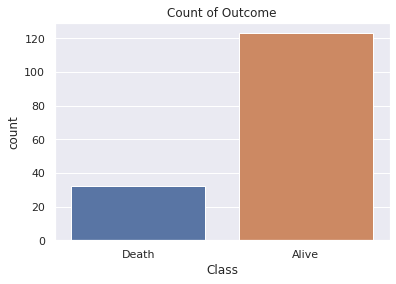

In [ ]:
class_count=sns.countplot(x="Class", data=imputedDF)
plt.gca().set_xticklabels(['Death','Alive']);
class_count.set_title("Count of Outcome")
class_count.figure.savefig('class_count.png')

# Κανονικοποίηση

In [ ]:
print(imputedDF.describe())
imputedDF.to_csv (r"/content/drive/MyDrive/Νευρωνικά δίκτυα εργασία 2/inputedDataSet", index = True)

            Class         Age  ...   Histology  Prothombin time
count  155.000000  155.000000  ...  155.000000       155.000000
mean     1.793548   41.200000  ...    1.451613        78.341935
std      0.406070   12.565878  ...    0.499266        25.594348
min      1.000000    7.000000  ...    1.000000         0.000000
25%      2.000000   32.000000  ...    1.000000        57.000000
50%      2.000000   39.000000  ...    1.000000       100.000000
75%      2.000000   50.000000  ...    2.000000       100.000000
max      2.000000   78.000000  ...    2.000000       100.000000

[8 rows x 9 columns]


Πρώτα ανακατεύω τα δεδομένα

In [ ]:
imputedDF = imputedDF.sample(frac = 1)

Και έπειτα τα κανονικοποιώ.

In [ ]:
X = imputedDF.iloc[:,1:]
y = imputedDF.iloc[:,:1]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fitting only to training data
scaler.fit(X_train)

#Now apply transformation to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(116, 18)

In [ ]:
print(Y_train)

     Class
131      1
127      1
145      2
107      2
106      1
..     ...
40       2
138      1
105      2
53       2
17       2

[116 rows x 1 columns]


#Δημιουργία Μοντέλου

Θα γίνει χρήση του MLP (multilayer Percepton) της βιβλιοθήκης scikit learn neural network ο οποίος χρησιμοποιεί back-propaggation.
Θα κατασκευάσω 3 μοντέλα τα οποία θα έχουν σαν συναρτηση ενεργοποίησης την relu. Στο κάθε μοντέλο θα χρησιμοποιήσω σαν solver βελτιστοποίησης βαρών τις μεθόδους sgd (stochastic gradient descend) , adam (adapative momentum) και lbfgs. Η adam δουλεύει καλύτερα σε μεγάλα πακέτα δεδομένων ενώ η lbfgs σε μικρά, όπως αυτό εδώ.

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(hidden_layer_sizes=(20), activation='relu', solver = 'sgd', tol = 0.001, verbose= True, momentum=1)
mlp1.fit(X_train, Y_train)

Iteration 1, loss = 0.72861382
Iteration 2, loss = 0.72758625
Iteration 3, loss = 0.72604963
Iteration 4, loss = 0.72400840
Iteration 5, loss = 0.72146920
Iteration 6, loss = 0.71844416
Iteration 7, loss = 0.71495814
Iteration 8, loss = 0.71100933
Iteration 9, loss = 0.70661330
Iteration 10, loss = 0.70180650
Iteration 11, loss = 0.69658213
Iteration 12, loss = 0.69096016
Iteration 13, loss = 0.68495717
Iteration 14, loss = 0.67858577
Iteration 15, loss = 0.67185288
Iteration 16, loss = 0.66479027
Iteration 17, loss = 0.65741843
Iteration 18, loss = 0.64976386
Iteration 19, loss = 0.64184964
Iteration 20, loss = 0.63371621
Iteration 21, loss = 0.62539611
Iteration 22, loss = 0.61690694
Iteration 23, loss = 0.60825352
Iteration 24, loss = 0.59949400
Iteration 25, loss = 0.59067594
Iteration 26, loss = 0.58179895
Iteration 27, loss = 0.57288293
Iteration 28, loss = 0.56397594
Iteration 29, loss = 0.55511135
Iteration 30, loss = 0.54630932
Iteration 31, loss = 0.53757706
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200, momentum=1,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [ ]:
mlp2 = MLPClassifier(hidden_layer_sizes = 20,activation = 'relu', solver = 'adam', tol = 0.001, verbose = True)
mlp2.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.78268995
Iteration 2, loss = 0.77399110
Iteration 3, loss = 0.76539244
Iteration 4, loss = 0.75689711
Iteration 5, loss = 0.74850886
Iteration 6, loss = 0.74023186
Iteration 7, loss = 0.73204638
Iteration 8, loss = 0.72395671
Iteration 9, loss = 0.71598734
Iteration 10, loss = 0.70813027
Iteration 11, loss = 0.70037747
Iteration 12, loss = 0.69272572
Iteration 13, loss = 0.68517065
Iteration 14, loss = 0.67772655
Iteration 15, loss = 0.67039848
Iteration 16, loss = 0.66317882
Iteration 17, loss = 0.65605936
Iteration 18, loss = 0.64904657
Iteration 19, loss = 0.64214177
Iteration 20, loss = 0.63534320
Iteration 21, loss = 0.62864177
Iteration 22, loss = 0.62205850
Iteration 23, loss = 0.61558001
Iteration 24, loss = 0.60920420
Iteration 25, loss = 0.60293028
Iteration 26, loss = 0.59675365
Iteration 27, loss = 0.59067282
Iteration 28, loss = 0.58469335
Iteration 29, loss = 0.57881188
Iteration 30, loss = 0.57302871
Iteration 31, loss = 0.56735757
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
mlp3 = MLPClassifier(hidden_layer_sizes = 10,activation = 'relu', solver = 'lbfgs', tol = 0.001)
mlp3.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#predicting test data using the 3 models
predictions1 = mlp1.predict(X_test)
predictions2 = mlp2.predict(X_test)
predictions3 = mlp3.predict(X_test)

Ελέγχω την ακρίβεια του μοντέλου

In [ ]:
#1st model
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,predictions1))
print(classification_report(Y_test,predictions1))

[[ 6  3]
 [ 3 27]]
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         9
           2       0.90      0.90      0.90        30

    accuracy                           0.85        39
   macro avg       0.78      0.78      0.78        39
weighted avg       0.85      0.85      0.85        39



In [ ]:
#2nd model
print(confusion_matrix(Y_test,predictions2))
print(classification_report(Y_test,predictions2))

[[ 6  3]
 [ 4 26]]
              precision    recall  f1-score   support

           1       0.60      0.67      0.63         9
           2       0.90      0.87      0.88        30

    accuracy                           0.82        39
   macro avg       0.75      0.77      0.76        39
weighted avg       0.83      0.82      0.82        39



In [ ]:
#3rd model
print(confusion_matrix(Y_test,predictions3))
print(classification_report(Y_test,predictions3))

[[ 4  5]
 [ 5 25]]
              precision    recall  f1-score   support

           1       0.44      0.44      0.44         9
           2       0.83      0.83      0.83        30

    accuracy                           0.74        39
   macro avg       0.64      0.64      0.64        39
weighted avg       0.74      0.74      0.74        39



In [ ]:
from sklearn.metrics import accuracy_score
print("1st model achieves ",accuracy_score(Y_test,predictions1)*100,"% accuracy")

1st model achieves  84.61538461538461 % accuracy


In [ ]:
print("2nd model achieves ",accuracy_score(Y_test,predictions2)*100,"% accuracy")

2nd model achieves  82.05128205128204 % accuracy


In [ ]:
print("3rd model achieves ",accuracy_score(Y_test,predictions3)*100,"% accuracy")

3rd model achieves  74.35897435897436 % accuracy
